# DYU Text mining workshop

In [75]:
# !pip install pandas
!pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
     |████████████████████████████████| 10.3 MB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 39.3 MB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 2.7 MB/s eta 0:00:01


## Import packages

In [76]:
import requests
import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns

## Udn news

### Step1: Request

In [17]:
url = 'https://udn.com/api/more?page=700&id=search:台積電&channelId=2&type=searchword'
resp = requests.get(url)
resp.json()

{'state': True,
 'page': 700,
 'end': True,
 'lists': [{'url': 'https://pgw.udn.com.tw/gw/photo.php?u=https://uc.udn.com.tw/photo/2014/07/29/99/126998.jpg',
   'titleLink': 'https://fund.udn.com/fund/story/5879/175767',
   'title': '基金facebook／鐘國忠投資三心法 搶賺龍年財',
   'paragraph': '【經濟日報╱文／魏興中】台股兔年封關。回顧過去、展望未來，日盛投顧分析師鐘國忠認為，龍年台股行情雖不看淡，但由於外在不確定性變因增加，使操作難度明顯提升，不過，秉持「投資目的、慎選老闆、景氣燈號」三...',
   'cateLink': 'https://fund.udn.com',
   'cateTitle': '基金',
   'time': {'dateTime': '2012-01-30 00:00:00', 'date': '2012-01-30 00:00:00'}},
  {'url': 'https://pgw.udn.com.tw/gw/photo.php?u=https://uc.udn.com.tw/photo/2014/07/29/99/126900.jpg',
   'titleLink': 'https://fund.udn.com/fund/story/5879/175628',
   'title': '基金facebook／陸行之 努力+努力 唯一心法',
   'paragraph': '【經濟日報╱文／溫建勳】巴克萊證券亞太半導體首席分析師陸行之，在外資圈素有「半導體一哥」的美名，甚至有人慕名而到巴克萊工作，希望從他身上學習如何成為研究產業的頂尖高手。但對他而言，化繁為簡的心法是：...',
   'cateLink': 'https://fund.udn.com',
   'cateTitle': '基金',
   'time': {'dateTime': '2012-01-16 00:00:00', 'date': '2012-01-16 00:00:00'}},
  {'u

### Step2: To DataFrame

In [18]:
url = 'https://udn.com/api/more?page=700&id=search:台積電&channelId=2&type=searchword'
resp = requests.get(url)
pd.DataFrame(resp.json()['lists'])

,url,titleLink,title,paragraph,cateLink,cateTitle,time
0,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://fund.udn.com/fund/story/5879/175767,基金facebook／鐘國忠投資三心法 搶賺龍年財,【經濟日報╱文／魏興中】台股兔年封關。回顧過去、展望未來，日盛投顧分析師鐘國忠認為，龍年台股...,https://fund.udn.com,基金,"{'dateTime': '2012-01-30 00:00:00', 'date': '2..."
1,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://fund.udn.com/fund/story/5879/175628,基金facebook／陸行之 努力+努力 唯一心法,【經濟日報╱文／溫建勳】巴克萊證券亞太半導體首席分析師陸行之，在外資圈素有「半導體一哥」的美...,https://fund.udn.com,基金,"{'dateTime': '2012-01-16 00:00:00', 'date': '2..."
2,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://health.udn.com/health/story/6032/357828,台積電員工「享瘦」 10周減20公斤,【聯合報╱記者周宗禎／台南報導】 台積電南科廠區上萬員工有4成過胖，廠方警覺辦「健康享瘦營」...,https://health.udn.com,元氣網,"{'dateTime': '2011-11-26 00:00:00', 'date': '2..."
3,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://health.udn.com/health/story/5964/355750,哪家公司午覺時間最長、哪家又可玩社團？,【元氣周報／記者薛翔之、賴昭穎、孫中英、朱婉寧、羅介妤、黃郁文／報導】上班族中午休息時間，有...,https://health.udn.com,元氣網,"{'dateTime': '2011-08-15 00:00:00', 'date': '2..."
4,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://health.udn.com/health/story/5999/351111,爆肝族：終於有保障了,【聯合報╱記者李青霖／新竹市報導】「真的嗎？太好了！」科技業「爆肝」多，新竹科學園區一名半導...,https://health.udn.com,元氣網,"{'dateTime': '2010-12-23 00:00:00', 'date': '2..."
5,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://health.udn.com/health/story/5999/351113,過勞死標準放寬 新增四項疾病認定,【聯合報╱記者湯雅雯、李青霖／台北—新竹連線報導】 高科技業常以「責任制」為由，未保留員工出...,https://health.udn.com,元氣網,"{'dateTime': '2010-12-23 00:00:00', 'date': '2..."
6,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://theme.udn.com/theme/story/6445/221292,曹興誠：兒不接班 不辦豪門婚禮,【聯合報╱記者何醒邦／台北報導】 六十三歲聯電榮譽董事長曹興誠昨天接受電視專訪，談到敏...,https://theme.udn.com,時事話題,"{'dateTime': '2010-04-10 00:00:00', 'date': '2..."
7,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://health.udn.com/health/story/5999/344702,止痛晶片 刷一下3個月不痛,【聯合晚報／記者王彩鸝／台北報導】一片十元大小的晶片植入腰部，身體疼痛時，只要用結合手機的感...,https://health.udn.com,元氣網,"{'dateTime': '2009-11-25 00:00:00', 'date': '2..."
8,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://theme.udn.com/theme/story/6404/220445,「經營」公益變獨大 就危險了,【聯合報/記者張錦弘、陳惠惠、 鄭朝陽、梁玉芳】問：你們當志工導正一些不幸家庭的孩子，最擔心...,https://theme.udn.com,時事話題,"{'dateTime': '2008-11-03 00:00:00', 'date': '2..."
9,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://theme.udn.com/theme/story/6439/220959,郭媽：我要馨瑩當女兒,【聯合報╱記者鄒秀明／台北報導】 鴻海董事長郭台銘與曾馨瑩昨晚舉辦婚宴，君悅飯店大廳用紅色...,https://theme.udn.com,時事話題,"{'dateTime': '2008-07-30 00:00:00', 'date': '2..."


### Step3: Loop

In [20]:
for page in range(1, 10):
    url = f'https://udn.com/api/more?page={page}&id=search:台積電&channelId=2&type=searchword'
    print(url)

https://udn.com/api/more?page=1&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=2&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=3&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=4&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=5&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=6&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=7&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=8&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=9&id=search:台積電&channelId=2&type=searchword


### Step4: Concat

In [22]:
df = []
for page in range(1, 10):
    url = f'https://udn.com/api/more?page={page}&id=search:台積電&channelId=2&type=searchword'
    print(url)
    resp = requests.get(url)
    ndf = pd.DataFrame(resp.json()['lists'])
    df.append(ndf)
df = pd.concat(df, ignore_index=True)
df

https://udn.com/api/more?page=1&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=2&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=3&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=4&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=5&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=6&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=7&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=8&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=9&id=search:台積電&channelId=2&type=searchword


,url,titleLink,title,paragraph,cateLink,cateTitle,time
0,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/6811/5871785,美國股市再創新高！基建法過關加添柴火 下周焉能不漲,美國股市周五再創歷史最高水準，由於美國10月就業數字強勁，加上輝瑞新冠口服藥成效顯著，激勵凡...,https://udn.com/news/cate/7225,全球,"{'dateTime': '2021-11-06 18:21:08', 'date': '2..."
1,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7326/5871010,台南就業旺！新營就博會5380職缺 三井outlet19日徵才,台南市政府今年最後一場大型徵才活動「台南好生活 台南呷頭路」就業博覽會，今在新營體育場外廣場...,https://udn.com/news/cate/6641,地方,"{'dateTime': '2021-11-06 11:44:08', 'date': '2..."
2,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7240/5870997,劉揚偉：美缺半導體基礎設施 估設廠成本較中國翻倍,鴻海（2317）董事長劉揚偉今日席在線上舉辦的2021美台高科技論壇，回應外界提問指出，美國...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-11-06 11:41:10', 'date': '2..."
3,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7240/5870903,重返母校淡江 陳進財：逆境才是人可以成長的環境,穩懋（3105）暨聯茂（6213）董事長陳進財今日重返母校淡江並獲授予名譽博士學位，他演講並...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-11-06 11:03:11', 'date': '2..."
4,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7240/5870807,劉揚偉：美國缺半導體基礎設施 設廠成本可能翻倍,鴻海董事長劉揚偉今天出席在線上舉辦的2021美台高科技論壇時表示，美國缺乏半導體基礎設施，設...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-11-06 10:04:41', 'date': '2..."
...,...,...,...,...,...,...,...
175,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7238/5856502,【財經展望周報】英特爾新處理器上市挑戰台積電／10月消費者物價指數能否下降？,美國晶片大廠英特爾（Intel）改變過去針對桌上型電電腦和筆電分開設計不同處理器後，推出全新...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-11-01 08:02:00', 'date': '2..."
176,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/6811/5857429,今天開盤前 五件國際事不可不知,美國股市上周五（29日）擺脫蘋果和亞馬遜財報利空的影響，尾盤由黑翻紅，三大指數同創歷史新高，...,https://udn.com/news/cate/7225,全球,"{'dateTime': '2021-11-01 06:56:07', 'date': '2..."
177,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7241/5857196,投資生醫／陳華鍵：精準醫療 磁吸聰明錢,生技產業五花八門，但聰明錢已悄悄看上「精準醫療」領域，例如專責「數據產生」的美國生技公司iI...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-11-01 02:54:12', 'date': '2..."
178,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7251/5857190,台股突圍 基本面當靠山,台股近來雖高檔承壓，不過隨美股道瓊等指數再創歷史新高，加上預期上市櫃10月營收將亮麗可期，市...,https://udn.com/news/cate/6645,股市,"{'dateTime': '2021-11-01 01:09:21', 'date': '2..."


In [24]:
ndf.shape[0]

20

### Step5: While loop

In [25]:
df = []
page = 1
while True:
    url = f'https://udn.com/api/more?page={page}&id=search:台積電&channelId=2&type=searchword'
    print(url)
    resp = requests.get(url)
    ndf = pd.DataFrame(resp.json()['lists'])
    df.append(ndf)
    page = page+1
    
    if ndf.shape[0] < 20:
        break
df = pd.concat(df, ignore_index=True)
df

https://udn.com/api/more?page=1&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=2&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=3&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=4&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=5&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=6&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=7&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=8&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=9&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=10&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=11&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=12&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=13&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=14&i

,url,titleLink,title,paragraph,cateLink,cateTitle,time
0,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/6811/5871785,美國股市再創新高！基建法過關加添柴火 下周焉能不漲,美國股市周五再創歷史最高水準，由於美國10月就業數字強勁，加上輝瑞新冠口服藥成效顯著，激勵凡...,https://udn.com/news/cate/7225,全球,"{'dateTime': '2021-11-06 18:21:08', 'date': '2..."
1,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7326/5871010,台南就業旺！新營就博會5380職缺 三井outlet19日徵才,台南市政府今年最後一場大型徵才活動「台南好生活 台南呷頭路」就業博覽會，今在新營體育場外廣場...,https://udn.com/news/cate/6641,地方,"{'dateTime': '2021-11-06 11:44:08', 'date': '2..."
2,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7240/5870997,劉揚偉：美缺半導體基礎設施 估設廠成本較中國翻倍,鴻海（2317）董事長劉揚偉今日席在線上舉辦的2021美台高科技論壇，回應外界提問指出，美國...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-11-06 11:41:10', 'date': '2..."
3,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7240/5870903,重返母校淡江 陳進財：逆境才是人可以成長的環境,穩懋（3105）暨聯茂（6213）董事長陳進財今日重返母校淡江並獲授予名譽博士學位，他演講並...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-11-06 11:03:11', 'date': '2..."
4,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7240/5870807,劉揚偉：美國缺半導體基礎設施 設廠成本可能翻倍,鴻海董事長劉揚偉今天出席在線上舉辦的2021美台高科技論壇時表示，美國缺乏半導體基礎設施，設...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-11-06 10:04:41', 'date': '2..."
...,...,...,...,...,...,...,...
13997,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://theme.udn.com/theme/story/6445/220722,曹興誠 強硬聲明展現擔當,【記者陳令軒】 雙魚座個性的聯電董事長曹興誠，60大壽就在下周。受到蘇州和艦案影響，他挺身...,https://theme.udn.com,時事話題,"{'dateTime': '2006-06-29 00:00:00', 'date': '2..."
13998,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://theme.udn.com/theme/story/6445/220723,"曹興誠,衝勁十足 能賺敢賺",【記者詹惠珠、林宏文/台北】 聯電董事長曹興誠，在半導體業界一向被視為爭議性人物，但談到他...,https://theme.udn.com,時事話題,"{'dateTime': '2006-06-29 00:00:00', 'date': '2..."
13999,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://theme.udn.com/theme/story/6441/220700,華碩董座施崇棠 捐台大5.4億,【記者喻文玟／台北報導】華碩電腦董事長、台大電機系校友施崇棠，個人捐五億四千萬元協助台大興建...,https://theme.udn.com,時事話題,"{'dateTime': '2006-06-18 00:00:00', 'date': '2..."
14000,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://theme.udn.com/theme/story/6439/220693,郭台銘送妻最後一程…,【記者林信昌／台北報導】 鴻海集團總裁郭台銘昨（31）日神情哀淒，送愛妻林淑如最後一程，她將...,https://theme.udn.com,時事話題,"{'dateTime': '2006-06-15 00:00:00', 'date': '2..."


### Step6: Save data

In [27]:
df.to_pickle('udnnews.pkl')

## TWSE

In [65]:
12%12

0

In [68]:
df = []
rs = requests.Session()
ymlist = pd.date_range(start='2010-01-01', end='2021-11-01', freq='MS')
for yyyymmdd in ymlist:
    ymd = yyyymmdd.strftime('%Y%m%d')
    url = f"https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date={ymd}&stockNo=2330"
    print(url)
    resp = rs.get(url)
    ndf = pd.DataFrame(data = resp.json()['data'],
                       columns=resp.json()['fields'])
    ndf['title'] = resp.json()['title']
    df.append(ndf)
    time.sleep(3)
df = pd.concat(df, ignore_index=True)
df

https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20100101&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20100201&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20100301&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20100401&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20100501&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20100601&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20100701&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20100801&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20100901&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20101001&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date

,Date,Trade Volume,Trade Value,Opening Price,Highest Price,Lowest Price,Closing Price,Change,Transaction,title
0,2010/01/04,"39,511,138","2,557,720,928",65.00,65.00,64.00,64.90,+0.40,"8,255",2010/01 Daily Trading Value/Volume of 2330
1,2010/01/05,"38,394,084","2,464,115,096",65.00,65.10,63.90,64.50,-0.40,"9,205",2010/01 Daily Trading Value/Volume of 2330
2,2010/01/06,"52,734,385","3,390,698,544",64.50,64.90,63.70,64.90,+0.40,"12,597",2010/01 Daily Trading Value/Volume of 2330
3,2010/01/07,"53,294,614","3,437,221,996",64.90,65.00,64.20,64.20,-0.70,"11,195",2010/01 Daily Trading Value/Volume of 2330
4,2010/01/08,"48,047,497","3,068,341,466",63.50,64.30,63.50,64.00,-0.20,"9,804",2010/01 Daily Trading Value/Volume of 2330
...,...,...,...,...,...,...,...,...,...,...
2910,2021/11/01,"17,110,357","10,107,402,871",591.00,593.00,590.00,590.00,0.00,"13,798",2021/11 Daily Trading Value/Volume of 2330
2911,2021/11/02,"16,544,999","9,808,608,554",594.00,597.00,590.00,592.00,+2.00,"11,662",2021/11 Daily Trading Value/Volume of 2330
2912,2021/11/03,"11,404,984","6,773,439,607",597.00,597.00,592.00,592.00,0.00,"8,934",2021/11 Daily Trading Value/Volume of 2330
2913,2021/11/04,"18,888,245","11,112,246,412",592.00,594.00,585.00,587.00,-5.00,"22,171",2021/11 Daily Trading Value/Volume of 2330


In [70]:
df.to_pickle('twse_2330.pkl')

## Vis
- 可以照新聞類型來視覺化

### udnnews

In [129]:
udnnews = pd.read_pickle('./udnnews.pkl')
udnnews.head(3)

,url,titleLink,title,paragraph,cateLink,cateTitle,time
0,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/6811/5871785,美國股市再創新高！基建法過關加添柴火 下周焉能不漲,美國股市周五再創歷史最高水準，由於美國10月就業數字強勁，加上輝瑞新冠口服藥成效顯著，激勵凡...,https://udn.com/news/cate/7225,全球,"{'dateTime': '2021-11-06 18:21:08', 'date': '2..."
1,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7326/5871010,台南就業旺！新營就博會5380職缺 三井outlet19日徵才,台南市政府今年最後一場大型徵才活動「台南好生活 台南呷頭路」就業博覽會，今在新營體育場外廣場...,https://udn.com/news/cate/6641,地方,"{'dateTime': '2021-11-06 11:44:08', 'date': '2..."
2,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7240/5870997,劉揚偉：美缺半導體基礎設施 估設廠成本較中國翻倍,鴻海（2317）董事長劉揚偉今日席在線上舉辦的2021美台高科技論壇，回應外界提問指出，美國...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-11-06 11:41:10', 'date': '2..."


In [ ]:
udnnews]

In [125]:
udnnews['time'] = udnnews['time'].apply(lambda x: x['dateTime'])
udnnews['time'] = udnnews['time'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d'))
udnnews.head(3)

,url,titleLink,title,paragraph,cateLink,cateTitle,time
0,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/6811/5871785,美國股市再創新高！基建法過關加添柴火 下周焉能不漲,美國股市周五再創歷史最高水準，由於美國10月就業數字強勁，加上輝瑞新冠口服藥成效顯著，激勵凡...,https://udn.com/news/cate/7225,全球,2021-11-06
1,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7326/5871010,台南就業旺！新營就博會5380職缺 三井outlet19日徵才,台南市政府今年最後一場大型徵才活動「台南好生活 台南呷頭路」就業博覽會，今在新營體育場外廣場...,https://udn.com/news/cate/6641,地方,2021-11-06
2,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7240/5870997,劉揚偉：美缺半導體基礎設施 估設廠成本較中國翻倍,鴻海（2317）董事長劉揚偉今日席在線上舉辦的2021美台高科技論壇，回應外界提問指出，美國...,https://udn.com/news/cate/6644,產經,2021-11-06


In [126]:
udnnews = udnnews.groupby(['time', 'cateTitle']).agg('size').reset_index(name='cnt')
# udnnews = udnnews.pivot(index='time', columns='cateTitle', values='cnt').reset_index()
udnnews = udnnews.fillna(0)
udnnews.head(3)

,time,cateTitle,cnt
0,2005-06-14,時事話題,1
1,2006-06-15,時事話題,1
2,2006-06-18,時事話題,1


<AxesSubplot:xlabel='time', ylabel='cnt'>

/home/tlyu0419/proposals/DYU_TextMining/dyu_tm_workshop/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 26178 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/tlyu0419/proposals/DYU_TextMining/dyu_tm_workshop/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20107 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/tlyu0419/proposals/DYU_TextMining/dyu_tm_workshop/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 35441 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/tlyu0419/proposals/DYU_TextMining/dyu_tm_workshop/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 38988 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/tlyu0419/proposals/DYU_TextMining/dyu_tm_workshop/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarni

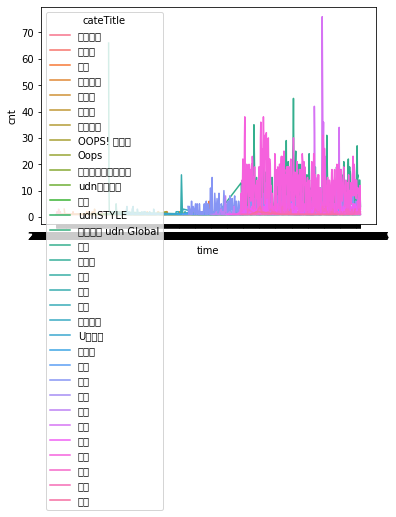

In [128]:
sns.lineplot(x='time',
             y='cnt',
             hue='cateTitle',
            data=udnnews)

### Volumn and Colsed price

In [ ]:
tsmc = pd.read_pickle('./twse_2330.pkl')

In [78]:
tsmc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           2915 non-null   object
 1   Trade Volume   2915 non-null   object
 2   Trade Value    2915 non-null   object
 3   Opening Price  2915 non-null   object
 4   Highest Price  2915 non-null   object
 5   Lowest Price   2915 non-null   object
 6   Closing Price  2915 non-null   object
 7   Change         2915 non-null   object
 8   Transaction    2915 non-null   object
 9   title          2915 non-null   object
dtypes: object(10)
memory usage: 227.9+ KB


### Word Cloud by category

In [ ]:
df = pd.read_pickle('./udnnews.pkl')

In [31]:
df['cateTitle'].value_counts()

股市                 4423
產經                 3468
雜誌                 1318
要聞                 1115
全球                 1024
房地產                 272
元氣網                 256
地方                  237
基金                  234
閱讀                  219
文教                  211
評論                  211
數位                  178
生活                  141
兩岸                  123
願景工程                103
聯合報                  80
時事話題                 66
Oops                 55
倡議家                  53
社會                   43
鳴人堂                  39
udnSTYLE             29
OOPS! 新鮮事            28
旅遊                   23
U值媒體                 12
運動                   10
噓！星聞                  9
udn遊戲角落               8
發燒車訊                  7
轉角國際 udn Global       5
【八仙：結痂日記】             2
Name: cateTitle, dtype: int64

### Linear regression

## NLP